<a href="https://colab.research.google.com/github/dli-invest/iref-book/blob/master/notebooks/references/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter stock name(ex:GOOGL, AAPL): AAPL
Getting historical stock prices for stock  AAPL


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Enter no of days to predict stock price for: 30


             ds      yhat  yhat_lower  yhat_upper
2015 2017-12-23  5.200161    5.146638    5.254966
2016 2017-12-24  5.201517    5.148746    5.259193
2017 2017-12-25  5.169957    5.114394    5.228529
2018 2017-12-26  5.172001    5.119131    5.228897
2019 2017-12-27  5.174156    5.120932    5.229025


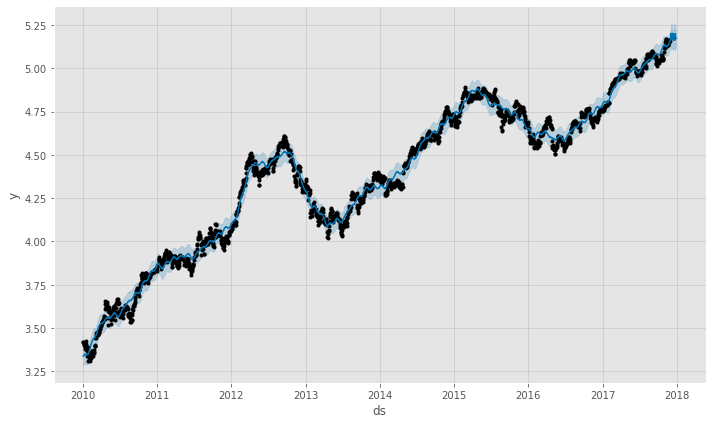

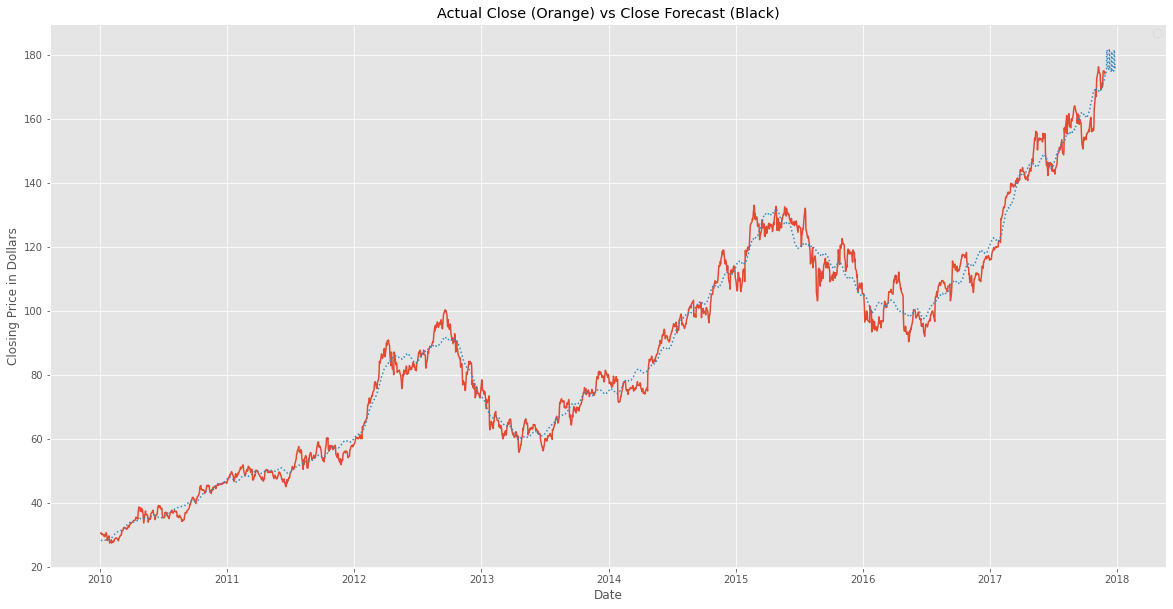

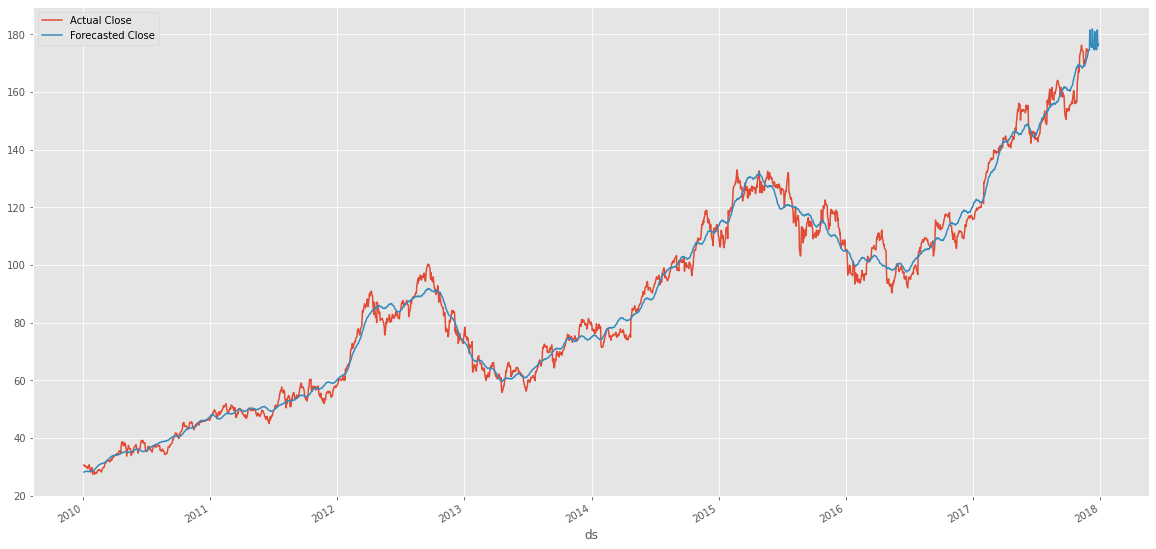

In [0]:
!pip install stocker
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from fbprophet import Prophet
import datetime
import matplotlib.pyplot as plt
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

#function to get stock data
def yahoo_stocks(symbol, start, end):
    return web.DataReader(symbol, 'yahoo', start, end)

def get_historical_stock_price(stock):
    print ("Getting historical stock prices for stock ", stock)
    
    #get 7 year stock data for Apple
    startDate = datetime.datetime(2010, 1, 4)
   # date = datetime.datetime.now().date()
   # endDate = pd.to_datetime(date)
    endDate = datetime.datetime(2017, 11, 27)
    stockData = yahoo_stocks(stock, startDate, endDate)
    return stockData

def main():
    stock = input("Enter stock name(ex:GOOGL, AAPL): ")
    df_whole = get_historical_stock_price(stock)
    
    df = df_whole.filter(['Close'])
    
    df['ds'] = df.index
    #log transform the ‘Close’ variable to convert non-stationary data to stationary.
    df['y'] = np.log(df['Close'])
    
    model = Prophet()
    model.fit(df)

    num_days = int(input("Enter no of days to predict stock price for: "))
    
    future = model.make_future_dataframe(periods=num_days)
    forecast = model.predict(future)
    
    print (forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
    
    #Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and
    #the uncertainty intervalsof our forecasts (the blue shaded regions).
    forecast_plot = model.plot(forecast)
    forecast_plot.show()
    
    #make the vizualization a little better to understand
    df.set_index('ds', inplace=True)
    forecast.set_index('ds', inplace=True)
    
    viz_df = df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
    viz_df['yhat_scaled'] = np.exp(viz_df['yhat'])
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
#    ax1.xaxis_date()
    ax1.plot(viz_df.index, viz_df.Close)
    ax1.plot(viz_df.index, viz_df.yhat_scaled, linestyle=':')
    ax1.set_title('Actual Close (Orange) vs Close Forecast (Black)')
    ax1.set_ylabel('Closing Price in Dollars')
    ax1.set_xlabel('Date')
    
    L = ax1.legend() #get the legend
    # L.get_texts()[0].set_text('Actual Close') #change the legend text for 1st plot
    # L.get_texts()[1].set_text('Forecasted Close') #change the legend text for 2nd plot
    
    plt.savefig('prophet.png', bbox_inches='tight')
    plt.show()
    
    #plot using dataframe's plot function
    viz_df['Actual Close'] = viz_df['Close']
    viz_df['Forecasted Close'] = viz_df['yhat_scaled']
    
    viz_df[['Actual Close', 'Forecasted Close']].plot()
main()